In [14]:
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
imagePath = "../peps_download/S2A_OPER_PRD_MSIL1C_PDMC_20160715T112823_R051_V20151113T105818_20151113T105818.SAFE/GRANULE/S2A_OPER_MSI_L1C_TL_EPA__20160715T072356_A002050_T30TXP_N02.04/IMG_DATA/"
band2 = rasterio.open(imagePath + 'S2A_OPER_MSI_L1C_TL_EPA__20160715T072356_A002050_T30TXP_B02.jp2', driver="JP2OpenJPEG") # blue
band3 = rasterio.open(imagePath + 'S2A_OPER_MSI_L1C_TL_EPA__20160715T072356_A002050_T30TXP_B03.jp2', driver="JP2OpenJPEG") # green
band4 = rasterio.open(imagePath + 'S2A_OPER_MSI_L1C_TL_EPA__20160715T072356_A002050_T30TXP_B04.jp2', driver="JP2OpenJPEG") # red
band8 = rasterio.open(imagePath + 'S2A_OPER_MSI_L1C_TL_EPA__20160715T072356_A002050_T30TXP_B08.jp2', driver="JP2OpenJPEG") # nir infrared

In [4]:
band4.count # bands in band 4

1

In [6]:
band4.width # columns

10980

In [7]:
band4.height # rows

10980

it's just a one row array, so height = width

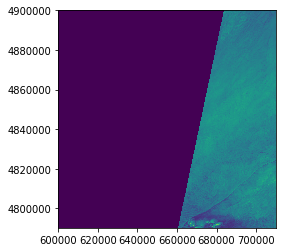

In [8]:
plot.show(band4)

In [9]:
band4.dtypes

('uint16',)

In [10]:
#raster sytem of reference
band4.crs # type of proyection (UTM information epsg:...)

CRS.from_dict(init='epsg:32630')

In [11]:
band4.transform # helpful when you want to convert a matrix into a raster

Affine(10.0, 0.0, 600000.0,
       0.0, -10.0, 4900020.0)

In [12]:
#raster values as matrix array
band4.read(1)

array([[   0,    0,    0, ..., 4691, 4744, 4729],
       [   0,    0,    0, ..., 4580, 4618, 4609],
       [   0,    0,    0, ..., 4589, 4652, 4650],
       ...,
       [   0,    0,    0, ..., 4773, 4841, 4922],
       [   0,    0,    0, ..., 4575, 4611, 4717],
       [   0,    0,    0, ..., 4536, 4587, 4688]], dtype=uint16)

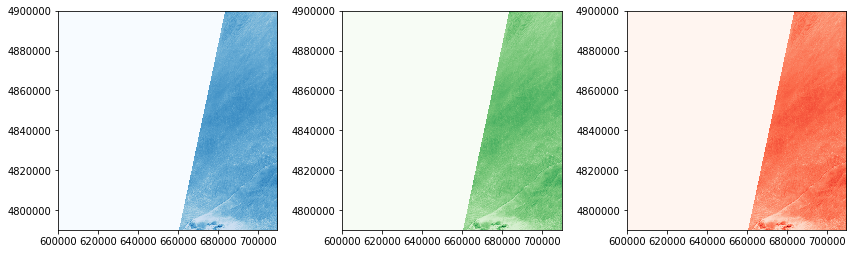

In [15]:
#multiple band representation
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
plot.show(band2, ax=ax1, cmap='Blues')
plot.show(band3, ax=ax2, cmap='Greens')
plot.show(band4, ax=ax3, cmap='Reds')
fig.tight_layout()

In [17]:
#export true color image
trueColor = rasterio.open('./output/SentinelTrueColor2.tiff','w',driver='Gtiff',
                         width=band4.width, height=band4.height,
                         count=3,
                         crs=band4.crs,
                         transform=band4.transform,
                         dtype=band4.dtypes[0]
                         )
trueColor.write(band2.read(1),3) #blue
trueColor.write(band3.read(1),2) #green
trueColor.write(band4.read(1),1) #red
trueColor.close()

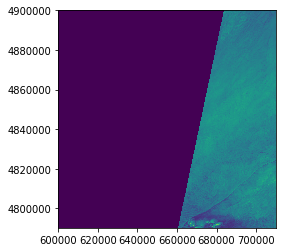

In [20]:
src = rasterio.open(r"./output/SentinelTrueColor2.tiff", count=3)
plot.show(src)

In [21]:
#export false color image
falseColor = rasterio.open('./output/SentinelFalseColor.tiff', 'w', driver='Gtiff',
                          width=band2.width, height=band2.height,
                          count=3,
                          crs=band2.crs,
                          transform=band2.transform,
                          dtype='uint16'                   
                         )
falseColor.write(band3.read(1),3) #Blue
falseColor.write(band4.read(1),2) #Green
falseColor.write(band8.read(1),1) #Red
falseColor.close()

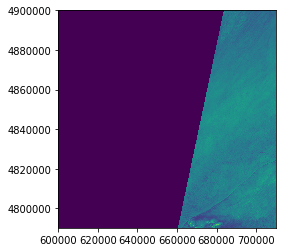

In [24]:
src = rasterio.open(r"./output/SentinelFalseColor.tiff")
plot.show(src)

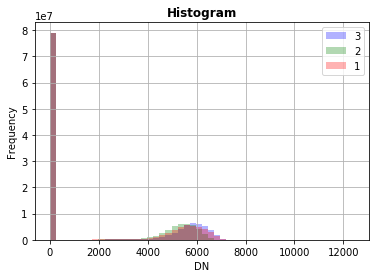

In [22]:
#generate histogram
trueColor = rasterio.open('./output/SentinelTrueColor2.tiff')
plot.show_hist(trueColor, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")